## Notebook set up

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

### Create dataset

In [2]:
# Generate the Friedman1 dataset
X, y = make_friedman1(n_samples=5000, n_features=5, random_state=315)

# Convert to DataFrame
X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])
y_series = pd.Series(y, name='label')

# Combine into a single DataFrame for easy exploration
df = X_df.copy()
df['label'] = y_series

# Display the first few rows
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,label
0,0.616679,0.279165,0.125676,0.315648,0.996900,16.091937
1,0.423093,0.112483,0.981730,0.719996,0.999457,18.328074
2,0.409812,0.596355,0.087318,0.646466,0.138363,17.508035
3,0.824479,0.906551,0.373458,0.400470,0.618359,14.544648
4,0.856326,0.250800,0.535109,0.944498,0.958171,20.507191


## Task 1: Train and evaluate a linear regression model

**Tasks**:

1. Split the data into training and testing sets using an 80-20 split. Use `random_state=315`.

2. Train a `LinearRegression` model on the training data.

3. Calculate and print the following metrics:
   - Training RMSE
   - Testing RMSE

4. Create a scatter plot of true vs. predicted values for the test set:
   - Add a diagonal reference line (y=x) to show perfect predictions
   - Label the axes appropriately
   - Add a title

**Hints**:

- Use `train_test_split()` with `test_size=0.2`
  - Example: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=315)`

- To calculate metrics:
  - First make predictions: `y_pred = model.predict(X_test)`
  - Then calculate: `rmse = root_mean_squared_error(y_test, y_pred)`

- To add a reference line to a plot:
  - `plt.plot([min, max], [min, max], 'k--', alpha=0.3)`

In [107]:
#We dont want to include the df['label'] seeing how that is our answers from our friedman so split them
X_train, X_test, Y_train, Y_test = train_test_split(X_df, y_series, test_size=0.2, random_state=315)

print(f'Original dataframe shape: {df.shape}')
print(f'Training X dataframe shape: {X_train.shape}')
print(f'Testing X dataframe shape: {X_test.shape}')
print(f'Training Y dataframe shape: {Y_train.shape}')
print(f'Testing Y dataframe shape: {Y_test.shape}')
print(f'Training Y values to expect for interpreting: \n{Y_train.describe()}')
print(f'Testing Y values to expect for interpreting: \n{Y_test.describe()}')

Original dataframe shape: (5000, 6)
Training X dataframe shape: (4000, 5)
Testing X dataframe shape: (1000, 5)
Training Y dataframe shape: (4000,)
Testing Y dataframe shape: (1000,)
Training Y values to expect for interpreting: 
count    4000.000000
mean       14.467846
std         4.842188
min         1.505311
25%        11.063005
50%        14.355424
75%        17.938347
max        28.459848
Name: label, dtype: float64
Testing Y values to expect for interpreting: 
count    1000.000000
mean       14.600785
std         4.963093
min         1.229517
25%        11.199695
50%        14.549466
75%        18.029263
max        27.492805
Name: label, dtype: float64


In [108]:
#Use base linear regression on our training data
model = LinearRegression()

#Pass in the y_train as target, target is already separated
fit_result = model.fit(
    X_train,
    Y_train
)

#Pass in the test as data to predict, NOT Y as it is answers not features
test_predictions = model.predict(
    X_test
)

#Pass in Y test values to see the amount of error in the prediction
test_rsq = root_mean_squared_error(Y_test, test_predictions)
print(f'Testing RMSE: {test_rsq:.2f}')

Testing RMSE: 2.44


In [109]:
train_predictions = model.predict(
    X_train
)

#Keep it consistent, use y train for train value errors for training values
train_rsq = root_mean_squared_error(Y_train, train_predictions)
print(f'Training RMSE: {train_rsq:.2f}')

Training RMSE: 2.44


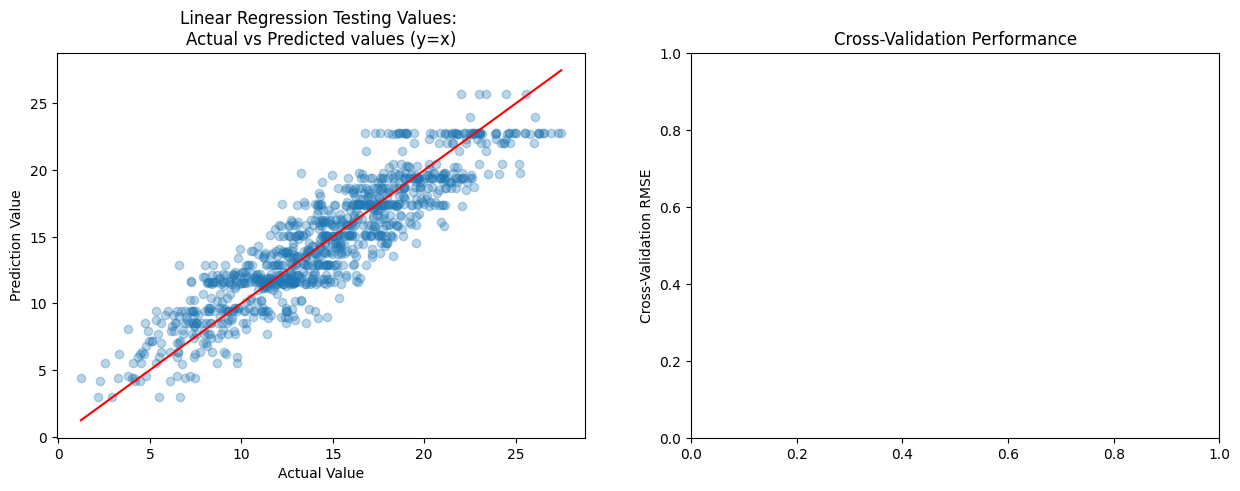

In [114]:
#Plot testing actual values (Y_test) vs testing predicted values (test_predictions)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(Y_test, test_predictions, alpha=0.3)
min_val = min(min(Y_test), test_predictions.min())
max_val = max(max(Y_test), test_predictions.max())
axes[0].plot([min_val, max_val], [min_val, max_val], color='red')


axes[0].set_title(f'Linear Regression Testing Values: \nActual vs Predicted values (y=x)')
axes[0].set_xlabel('Actual Value')
axes[0].set_ylabel('Prediction Value')


# cv_scores = cross_val_score(
#     model,
#     test_predictions,
#     Y_test,
#     cv=5,
#     scoring='neg_root_mean_squared_error'
# )
# cv_rmse = -cv_scores

#Test cross validation with a CI of 95% to ensure our model's RMSE is valid, and not overfitted
# mean_cv_rmse = cv_rmse.mean()
# std_cv_rmse = cv_rmse.std()
# ci_95 = 1.95 * std_cv_rmse / np.sqrt(len(cv_rmse))

# axes[1].boxplot()
axes[1].set_title('Cross-Validation Performance')
axes[1].set_ylabel('Cross-Validation RMSE')

# plt.suptitle('', fontweight='bold')
plt.show()

Y_test describe information:
- count    1000.000000
- mean       14.600785
- std         4.963093
- min         1.229517
- 25%        11.199695
- 50%        14.549466
- 75%        18.029263
- max        27.492805

Looking at the information of our Y_test our RMSE to the STD is very good! We got 49% of the STD. If RMSE is < 0.5 × STD this is amazing results.
- Amazing - < .5 x STD
- OK - .5 to 1 x STD
- Weak - about = STD
- Bad - > STD

 We missed our data by 2.44 units, our mean is 14.6 so -> 2.44/14.6 = .167 or 17% of error of mean. Amazing!

## Task 2: Train and evaluate a decision tree model

**Tasks**:

1. Train the decision tree model (provided below) on the training data from Task 1.

2. Calculate and print the following metrics for the decision tree:
   - Training RMSE
   - Testing RMSE

3. Create a scatter plot of true vs. predicted values for the test set:
   - Add a diagonal reference line (y=x) to show perfect predictions
   - Label the axes appropriately
   - Add a title

4. Compare the decision tree metrics to the linear regression metrics from Task 1:
   - Which model has lower testing RMSE?
   - How do the two models differ in their predictions?

**Hints**:

- Use the same `X_train`, `X_test`, `y_train`, `y_test` from Task 1

In [185]:
# Initialize and train the decision tree model
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_split=30, min_samples_leaf=15, random_state=315)
# dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)

# Your code here to calculate metrics and create visualizations
#Pass in the training as data to predict
training_predictions = dt_model.predict(
    X_train
)

#Pass in Y train values to see the amount of error in the prediction
train_rsq = root_mean_squared_error(Y_train, training_predictions)
print(f'Training RMSE: {train_rsq:.6f}')

Training RMSE: 1.719722


In [186]:
#Pass in the test as data to predict
test_predictions = dt_model.predict(
    X_test
)

#Pass in Y test values to see the amount of error in the prediction
test_rsq = root_mean_squared_error(Y_test, test_predictions)
print(f'Testing RMSE: {test_rsq:.6f}')

Testing RMSE: 2.090083


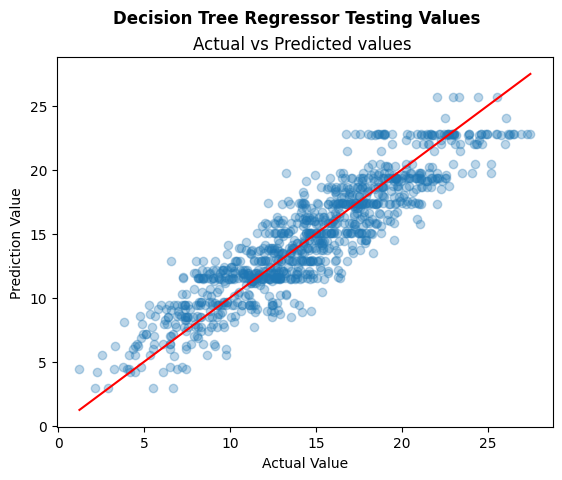

In [88]:
#Plot testing actual values (Y_test) vs testing predicted values (test_predictions)
plt.scatter(Y_test, test_predictions, alpha=0.3)
min_val = min(min(Y_test), test_predictions.min())
max_val = max(max(Y_test), test_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.suptitle('Decision Tree Regressor Testing Values', fontweight='bold')
plt.title('Actual vs Predicted values ')
plt.xlabel('Actual Value')
plt.ylabel('Prediction Value')

plt.show()

Y_test describe information:
- count    1000.000000
- mean       14.600785
- std         4.963093
- min         1.229517
- 25%        11.199695
- 50%        14.549466
- 75%        18.029263
- max        27.492805

Looking at the information of our Y_test our RMSE to the STD is very good! We got 35% of the STD. Remember, if RMSE is < 0.5 × STD this is amazing results.
- Amazing - < .5 x STD
- OK - .5 to 1 x STD
- Weak - about = STD
- Bad - > STD

We missed our data by 2.09 units, our mean is 14.6 so -> 2.09/14.6 = .143 or 14% of error of mean. Amazing!

## Task 3: Investigate why the models perform differently

**Tasks**:

1. Create visualizations to understand the relationship between features and label:
   - For features 0 and 1: Create a 2D scatter plot colored by the label value (use a colormap)
   - For features 2, 3, and 4: Create individual scatter plots vs. label

2. Based on your plots:
   - Identify which relationships are linear
   - Identify which relationships are non-linear
   - Explain how this affects each model's performance

3. (Optional) Try to improve the linear regression model by adding polynomial features for the non-linear relationships. Does this improve performance?

**Hints**:

- For a 2D scatter plot with color mapping:
  - `plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')`
  - `plt.colorbar(label='Label')`

- The decision tree can capture non-linear relationships by splitting the feature space, while linear regression assumes linear relationships

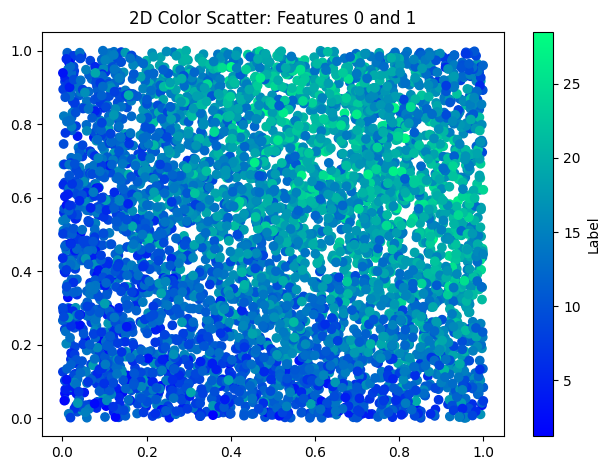

In [ ]:
plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_series, cmap='winter')
plt.colorbar(label='Label')
plt.title('2D Color Scatter: Features 0 and 1')
plt.xlabel('feature_0')
plt.ylabel('feature_1')


plt.tight_layout()
plt.show()


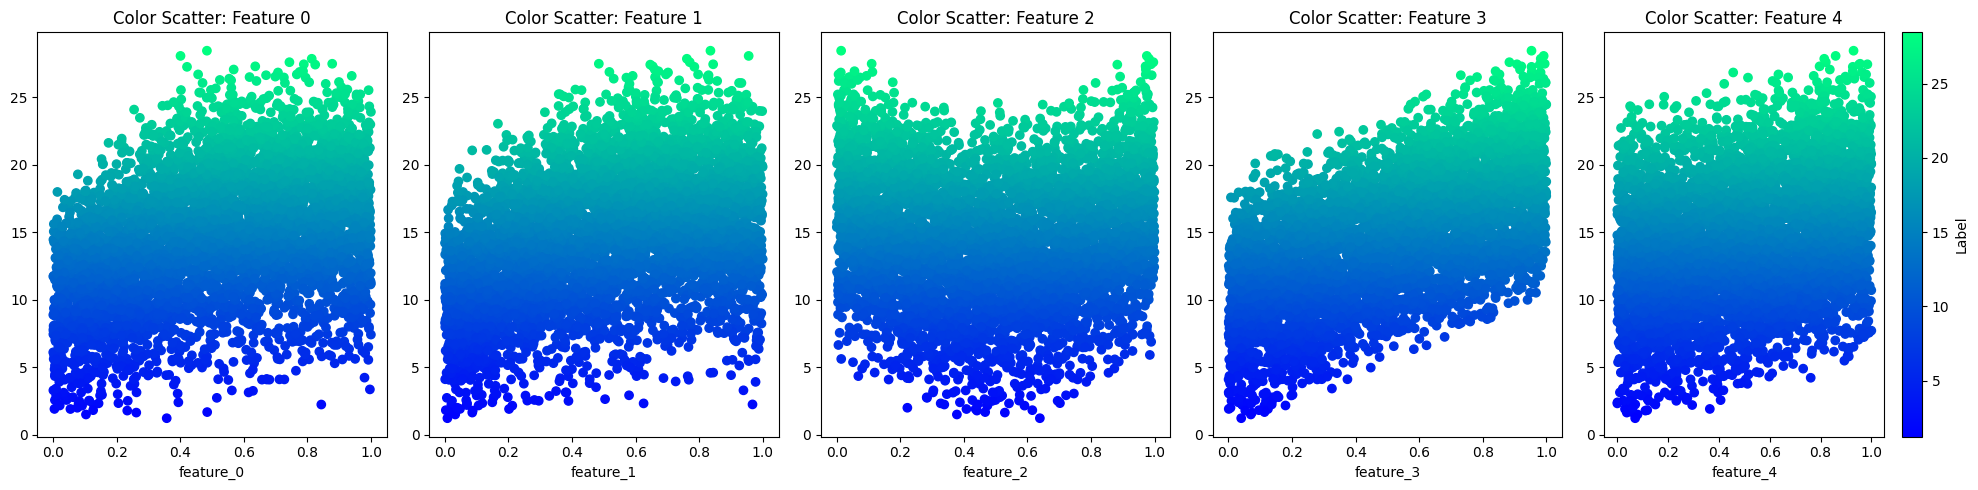

In [188]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i in range(0, 5):
    scat = axes[i].scatter(X_df[f'feature_{i}'], y_series, c=y_series, cmap='winter')
    axes[i].set_title(f'Color Scatter: Feature {i}')
    axes[i].set_xlabel(f'feature_{i}')
    # axes[i].set_ylabel('label values')

fig.colorbar(scat, ax=axes[4], label='Label')

plt.tight_layout()
plt.show()

Looking at these features the features 3 and 4 look the most linear. Looking at 0, 1, and 2, there seems to be a curve which would cause the linear regression to have a harder time to fit and predict the outcome of these features. 

In [169]:
X_df[['feature_0', 'feature_1', 'feature_2']]

,feature_0,feature_1,feature_2
0,0.616679,0.279165,0.125676
1,0.423093,0.112483,0.981730
2,0.409812,0.596355,0.087318
3,0.824479,0.906551,0.373458
4,0.856326,0.250800,0.535109
...,...,...,...
4995,0.773443,0.709719,0.178799
4996,0.749673,0.351252,0.647176
4997,0.216259,0.281063,0.441147
4998,0.342169,0.861381,0.447116


In [170]:
#Trying polynomial features on 0 1 and 2 for linear improvement
from sklearn.preprocessing import PolynomialFeatures

x_poly = PolynomialFeatures(degree=2)  #2
new_x = x_poly.fit_transform(X_df[['feature_0', 'feature_1', 'feature_2']])
new_feature_names = x_poly.get_feature_names_out()

new_poly_df = pd.DataFrame(new_x, columns=new_feature_names)
polyfied_X = pd.concat([X_df, new_poly_df], axis=1)

#Remove duplicate columns
polyfied_X = polyfied_X.loc[:, ~polyfied_X.columns.duplicated()]
polyfied_X

,feature_0,feature_1,feature_2,feature_3,feature_4,1,feature_0^2,feature_0 feature_1,feature_0 feature_2,feature_1^2,feature_1 feature_2,feature_2^2
0,0.616679,0.279165,0.125676,0.315648,0.996900,1.0,0.380293,0.172156,0.077502,0.077933,0.035084,0.015794
1,0.423093,0.112483,0.981730,0.719996,0.999457,1.0,0.179008,0.047591,0.415363,0.012652,0.110428,0.963794
2,0.409812,0.596355,0.087318,0.646466,0.138363,1.0,0.167945,0.244393,0.035784,0.355640,0.052072,0.007624
3,0.824479,0.906551,0.373458,0.400470,0.618359,1.0,0.679765,0.747432,0.307908,0.821834,0.338559,0.139471
4,0.856326,0.250800,0.535109,0.944498,0.958171,1.0,0.733293,0.214766,0.458227,0.062901,0.134205,0.286341
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.773443,0.709719,0.178799,0.392629,0.703520,1.0,0.598214,0.548927,0.138291,0.503700,0.126897,0.031969
4996,0.749673,0.351252,0.647176,0.589600,0.560504,1.0,0.562009,0.263324,0.485170,0.123378,0.227322,0.418837
4997,0.216259,0.281063,0.441147,0.685133,0.083057,1.0,0.046768,0.060782,0.095402,0.078996,0.123990,0.194610
4998,0.342169,0.861381,0.447116,0.987200,0.352474,1.0,0.117079,0.294738,0.152989,0.741977,0.385137,0.199912


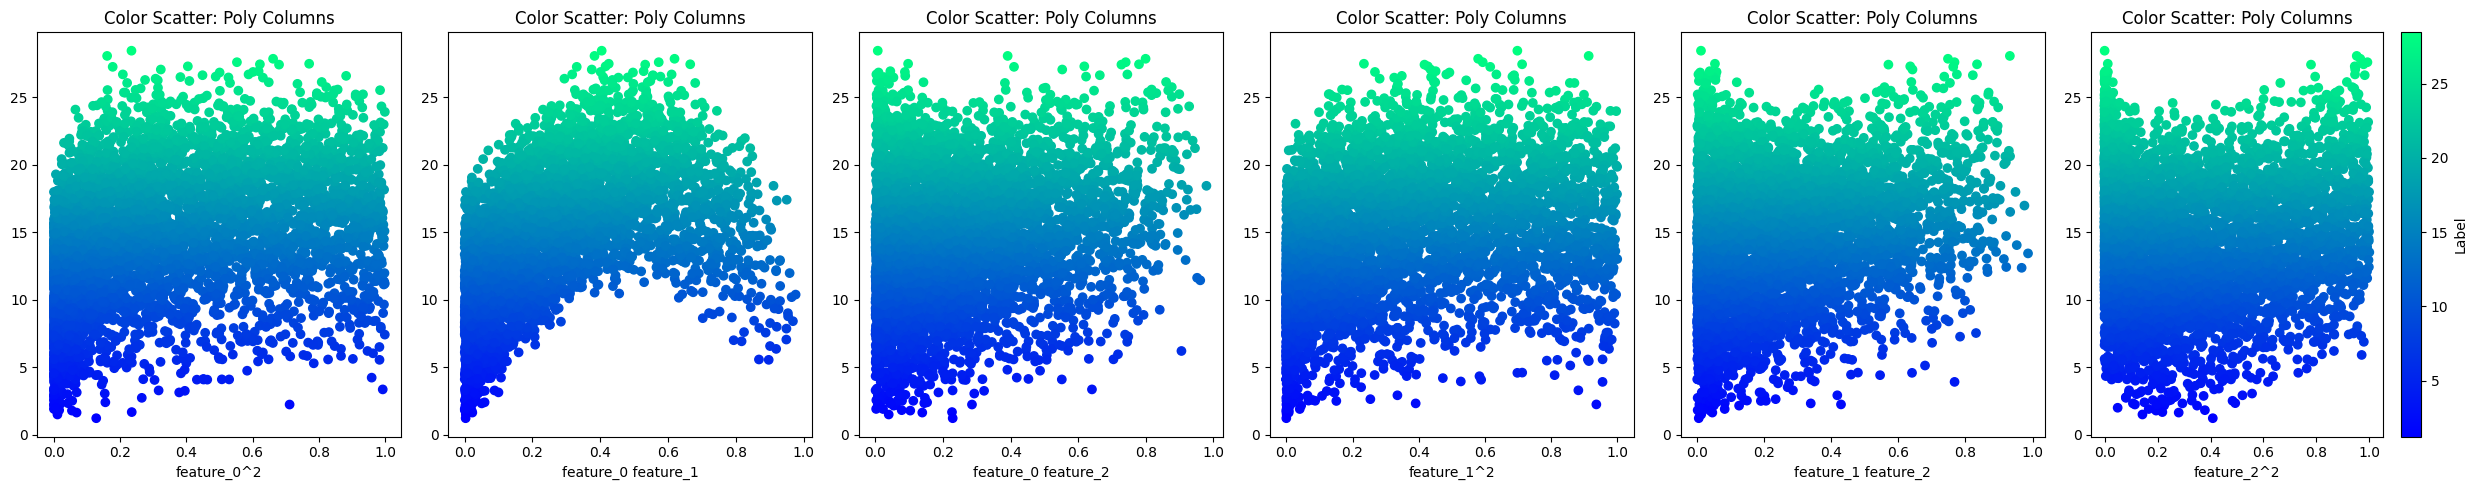

In [191]:
#Plot polynomial version of our linear regresson model to see the difference
fig, axes = plt.subplots(1, 6, figsize=(25, 5))

for i in range(0, 6):
    scat = axes[i].scatter(polyfied_X.iloc[:,i+6], y_series, c=y_series, cmap='winter')
    axes[i].set_title(f'Color Scatter: Poly Columns')
    axes[i].set_xlabel(f'{polyfied_X.columns[i+6]}')
    # axes[i].set_ylabel('label values')

fig.colorbar(scat, ax=axes[5], label='Label')

plt.tight_layout()
plt.show()

I'm not sure about the polynomial, it could have made the situation worse? it did create a bunch of 2nd degree features which is not what we would want for a linear regression to go against. Would need further research on how to improve engineering our data. 



In [208]:
poly_X_train, poly_X_test = train_test_split(polyfied_X, test_size=0.2, random_state=315)

In [206]:
#Use base linear regression on our training data
model = LinearRegression()

#Pass in the y_train as target, target is already separated
fit_result = model.fit(
    poly_X_train.drop(columns='feature_0 feature_1'),
    poly_X_train['feature_0 feature_1']
)

#Pass in the test as data to predict, NOT Y as it is answers not features
train_predictions = model.predict(
    poly_X_train.drop(columns='feature_0 feature_1')
)

#Pass in Y test values to see the amount of error in the prediction
train_rsq = root_mean_squared_error(poly_X_train['feature_0 feature_1'], train_predictions)
print(f'Training RMSE: {train_rsq:.2f}')

Training RMSE: 0.08


In [209]:
test_predictions = model.predict(
    poly_X_test.drop(columns='feature_0 feature_1')
)

#Keep it consistent, use y train for train value errors for training values
test_rsq = root_mean_squared_error(poly_X_test['feature_0 feature_1'], test_predictions)
print(f'Testing RMSE: {test_rsq:.2f}')

Testing RMSE: 0.08


The above assumption just from viewing the graphing displayed, was incorrect, the polynomial featuring increased predictability by a lot more than what was shown previously. The model almost perfectly predicts this data. 

In [211]:
cv_scores = cross_val_score(
    model,
    polyfied_X.drop(columns='feature_0 feature_1'),
    polyfied_X['feature_0 feature_1'],
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=5
)

rmse_mean = np.mean(cv_scores)
rmse_std = np.std(cv_scores)
moe_95 = 1.96 * rmse_std / np.sqrt(len(cv_scores))

print(f'Mean cross-validation RMSE: {rmse_mean:.1f} ± {moe_95:.1f}')
print(f'95% CI: ± {rmse_mean - moe_95:.1f} to {rmse_mean + moe_95:.1f}')
print(f'Test RMSE: {test_rsq:.1f}')

Mean cross-validation RMSE: -0.1 ± 0.0
95% CI: ± -0.1 to -0.1
Test RMSE: 0.1


**Comparison**:
Looking at our percentage of errors it is clear that the Decision Tree Regressor is better, the percentage of error in predicting our actual values is lower. This means the data isn've very linear and is to be expected to be worse when using a linear regression model.

## Reflection

Based on your analysis, answer the following questions:

1. **Model performance**: Which model performed better and why?

2. **Linear assumptions**: What happens when you apply linear regression to non-linear data?

3. **Model complexity**: What are the trade-offs between simpler models (linear regression) and more complex models (decision trees)?

4. **Real-world implications**: In what situations would you prefer:
   - A linear regression model?
   - A decision tree model?
   - Consider factors like interpretability, performance, and data characteristics.